# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [106]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [107]:
# %pip install --upgrade plotly

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
import iso3166
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [40]:
df_data = pd.read_csv('mission_launches.csv')
df_data.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_data.shape

(4324, 9)

In [5]:
print(f"Columns: {list(df_data.columns)}")

Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status']


In [6]:
# Check for missing values
missing_values = df_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = df_data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

Missing Values:
 Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

Number of Duplicate Rows: 0


In [7]:
# Calculate the number of missing values in the 'Price' column
missing_values_count = df_data['Price'].isnull().sum()

# Calculate the total number of values in the 'Price' column
total_values_count = df_data['Price'].shape[0]

# Calculate the percentage of missing values
missing_percentage = (missing_values_count / total_values_count) * 100

# Print the percentage of missing values
print(f"Percentage of missing values in the 'Price' column: {missing_percentage:.2f}%")

Percentage of missing values in the 'Price' column: 77.71%


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [41]:
df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df_data.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


In [9]:
# Drop duplicate rows
df_data.drop_duplicates(inplace=True)

# Check the shape of the dataset after dropping duplicates
print("Shape of the dataset after dropping duplicates:", df_data.shape)

Shape of the dataset after dropping duplicates: (4323, 7)


## Descriptive Statistics

In [10]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4323 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4323 non-null   object
 1   Location        4323 non-null   object
 2   Date            4323 non-null   object
 3   Detail          4323 non-null   object
 4   Rocket_Status   4323 non-null   object
 5   Price           963 non-null    object
 6   Mission_Status  4323 non-null   object
dtypes: object(7)
memory usage: 270.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [12]:
# Count the number of space missions by organization
mission_counts = df_data['Organisation'].value_counts()
print(mission_counts)

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

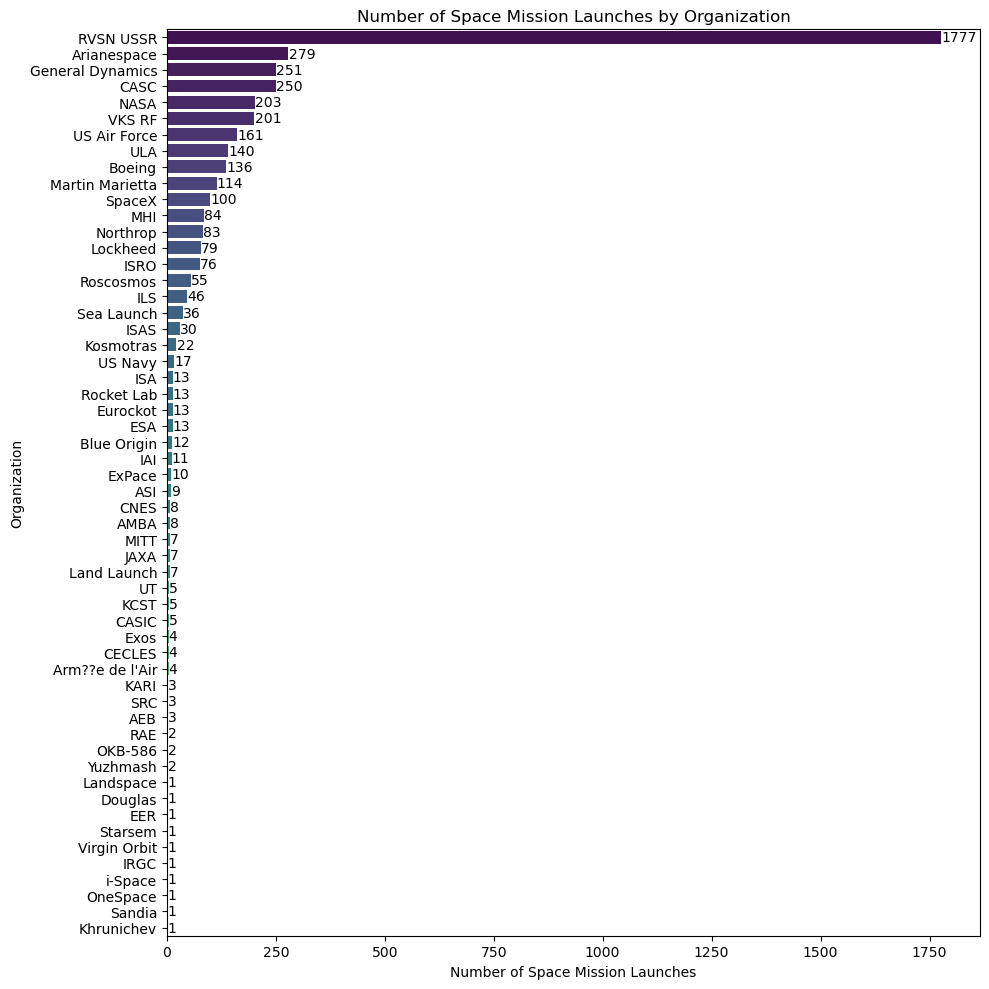

In [13]:
# Plotting
plt.figure(figsize=(10, 10))
sns.barplot(y=mission_counts.index, x=mission_counts.values, palette='viridis')

# Annotate each bar with its value
for i, count in enumerate(mission_counts.values):
    plt.text(count + 0.1, i, str(count), ha='left', va='center')

plt.title('Number of Space Mission Launches by Organization')
plt.xlabel('Number of Space Mission Launches')
plt.ylabel('Organization')
plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [14]:
# Count the number of rockets by status
rocket_status_counts = df_data['Rocket_Status'].value_counts()
rocket_status_counts

Rocket_Status
StatusRetired    3534
StatusActive      789
Name: count, dtype: int64

In [15]:
# Calculate the total number of rockets
total_rockets = len(df_data)

# Get the counts of active and decommissioned rockets
active_rockets = rocket_status_counts.get('StatusActive', 0)
decommissioned_rockets = rocket_status_counts.get('StatusRetired', 0)

# Calculate the percentage of active and decommissioned rockets
active_percentage = (active_rockets / total_rockets) * 100
decommissioned_percentage = (decommissioned_rockets / total_rockets) * 100

# Display the results
print("Number of Active Rockets:", active_rockets, "({:.2f}%)".format(active_percentage))
print("Number of Decommissioned Rockets:", decommissioned_rockets, "({:.2f}%)".format(decommissioned_percentage))


Number of Active Rockets: 789 (18.25%)
Number of Decommissioned Rockets: 3534 (81.75%)


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [16]:
# Count the number of successful and failed missions
success_count = (df_data['Mission_Status'] == 'Success').sum()
failure_count = (df_data['Mission_Status'] == 'Failure').sum()

# Display the counts
print("Number of Successful Missions:", success_count)
print("Number of Failed Missions:", failure_count)

Number of Successful Missions: 3878
Number of Failed Missions: 339


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

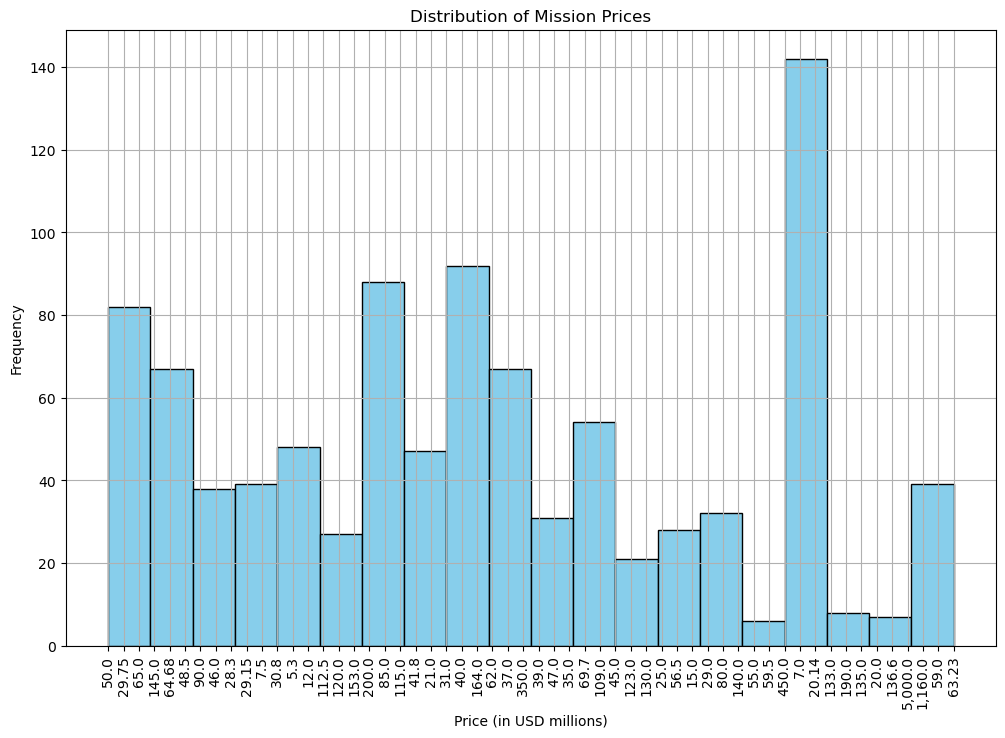

In [17]:
import matplotlib.pyplot as plt

# Filter out missing values and plot the histogram
plt.figure(figsize=(12, 8))
plt.hist(df_data['Price'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Mission Prices')
plt.xlabel('Price (in USD millions)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [18]:
df_data.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


In [48]:
# Wrangle the country names
country_name_changes = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}

# Apply country name changes
df_data['Location'] = df_data['Location'].replace(country_name_changes)

# Extract country names from the end of the "Location" column
def extract_country(location):
    parts = location.split(', ')
    country_name = parts[-1]
    return country_name

# Apply the function to extract country names
df_data['Country'] = df_data['Location'].apply(extract_country)

In [49]:
# Convert country names to ISO 3166-1 alpha-3 codes
iso_codes = {}
for country_name in df_data['Country'].unique():
    try:
        iso_code = iso3166.countries.get(country_name).alpha3
        iso_codes[country_name] = iso_code
    except:
        pass

# Map country names to ISO codes
df_data['ISO'] = df_data['Country'].map(iso_codes)

# Calculate the number of launches per country
launches_by_country = df_data['ISO'].value_counts().reset_index()
launches_by_country.columns = ['ISO', 'Launches']

# Create choropleth map using Plotly
fig = px.choropleth(launches_by_country, 
                    locations='ISO', 
                    color='Launches',
                    hover_name='ISO',
                    color_continuous_scale='matter',
                    title='Number of Launches by Country')
fig.show()


# Use a Choropleth Map to Show the Number of Failures by Country


In [50]:
import iso3166

# Convert country names to ISO 3166-1 alpha-3 codes
iso_codes = {}
for country_name in df_data['Country'].unique():
    try:
        iso_code = iso3166.countries.get(country_name).alpha3
        iso_codes[country_name] = iso_code
    except:
        pass

# Map country names to ISO codes
df_data['ISO'] = df_data['Country'].map(iso_codes)

# Filter data for failed missions
failed_missions = df_data[df_data['Mission_Status'] == 'Failure']

# Calculate the number of failures per country
failures_by_country = failed_missions['ISO'].value_counts().reset_index()
failures_by_country.columns = ['ISO', 'Failures']

# Create choropleth map using Plotly
fig = px.choropleth(failures_by_country, 
                    locations='ISO', 
                    color='Failures',
                    hover_name='ISO',
                    color_continuous_scale='matter',
                    title='Number of Failures by Country')
fig.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [46]:
df_data.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA


In [51]:
# Extract country names from the end of the "Location" column

# Create Sunburst Chart using Plotly
fig = px.sunburst(df_data, path=['Country', 'Organisation', 'Mission_Status'], width=800, height=800)
fig.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [52]:
# Convert 'Price' column to numeric
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

# Group by 'Organisation' and calculate total amount spent
total_spending = df_data.groupby('Organisation')['Price'].sum().reset_index()

# Sort the results by total spending
total_spending = total_spending.sort_values(by='Price', ascending=False)

# Display the results
print(total_spending)


        Organisation     Price
35              NASA 61,200.00
3        Arianespace 16,345.00
48               ULA 14,798.00
7               CASC  6,340.26
46            SpaceX  5,444.00
36          Northrop  3,930.00
32               MHI  3,532.50
23              ISRO  2,177.00
49      US Air Force  1,550.92
52            VKS RF  1,548.90
19               ILS  1,320.00
6             Boeing  1,241.00
42         Roscosmos  1,187.50
34   Martin Marietta    721.40
28         Kosmotras    638.00
14          Eurockot    543.40
31          Lockheed    280.00
24              JAXA    168.00
41        Rocket Lab     97.50
13               ESA     37.00
15            ExPace     28.30
12               EER     20.00
44            Sandia     15.00
53      Virgin Orbit     12.00
43               SRC      0.00
50           US Navy      0.00
47           Starsem      0.00
40         RVSN USSR      0.00
39               RAE      0.00
38          OneSpace      0.00
37           OKB-586      0.00
51      

# Analyse the Amount of Money Spent by Organisation per Launch

In [53]:
# Group by 'Organisation' and calculate total amount spent
total_spending = df_data.groupby('Organisation')['Price'].sum()

# Count the number of launches by each organization
launch_count = df_data['Organisation'].value_counts()

# Calculate amount spent per launch
amount_per_launch = total_spending / launch_count

# Combine the results into a DataFrame
analysis_df = pd.DataFrame({'Total Amount Spent': total_spending,
                            'Launch Count': launch_count,
                            'Amount Spent per Launch': amount_per_launch})

# Display the results
print(analysis_df)


                  Total Amount Spent  Launch Count  Amount Spent per Launch
Organisation                                                               
AEB                             0.00             3                     0.00
AMBA                            0.00             8                     0.00
ASI                             0.00             9                     0.00
Arianespace                16,345.00           279                    58.58
Arm??e de l'Air                 0.00             4                     0.00
Blue Origin                     0.00            12                     0.00
Boeing                      1,241.00           136                     9.12
CASC                        6,340.26           251                    25.26
CASIC                           0.00             5                     0.00
CECLES                          0.00             4                     0.00
CNES                            0.00             8                     0.00
Douglas     

# Chart the Number of Launches per Year

In [54]:
df_data.Date.head(2)

0    Fri Aug 07, 2020 05:12 UTC
1    Thu Aug 06, 2020 04:01 UTC
Name: Date, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_1404\1248430180.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



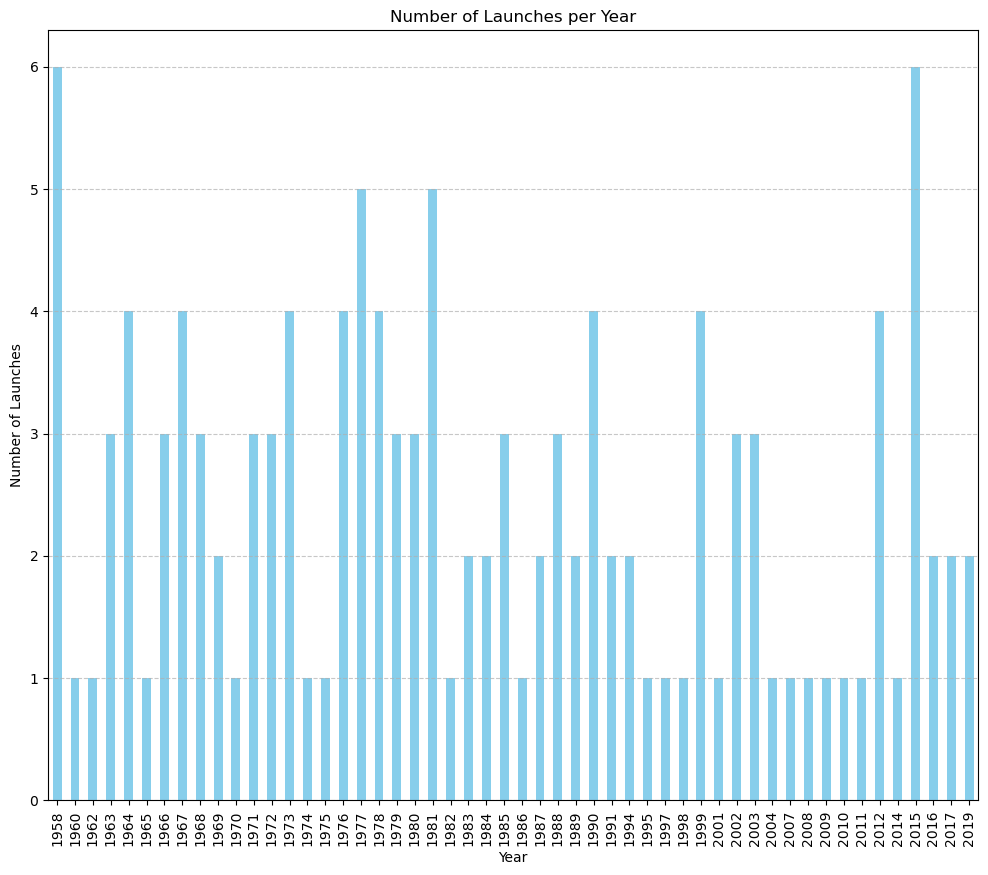

In [55]:
# Convert 'Date' column to datetime (excluding time and time zone)
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%a %b %d, %Y', errors='coerce')

# Drop rows with NaT (missing values)
df_data = df_data.dropna(subset=['Date'])

# Extract year from 'Date' column
df_data['Year'] = df_data['Date'].dt.year

# Count the number of launches per year
launches_per_year = df_data['Year'].value_counts().sort_index()

# Plot the number of launches per year
plt.figure(figsize=(12, 10))
launches_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [56]:
df_data.Date.head(2)

106   2019-08-29
163   2019-02-05
Name: Date, dtype: datetime64[ns]

In [57]:
# Extract month name from 'Date' column
df_data['Month'] = df_data['Date'].dt.strftime('%B')  # %B gives full month name, %b gives abbreviated month name

# Group by month and count the number of launches
launches_per_month = df_data.groupby('Month').size()

# Calculate the rolling average of monthly launches
rolling_average = launches_per_month.rolling(window=12).mean()  # Adjust window size as needed

# Find the month with the highest number of launches
max_launches_month = launches_per_month.idxmax()
max_launches_count = launches_per_month.max()
print(f"The month with the highest number of launches is {max_launches_month} with {max_launches_count} launches.")

The month with the highest number of launches is December with 20 launches.


C:\Users\Admin\AppData\Local\Temp\ipykernel_1404\2246385306.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

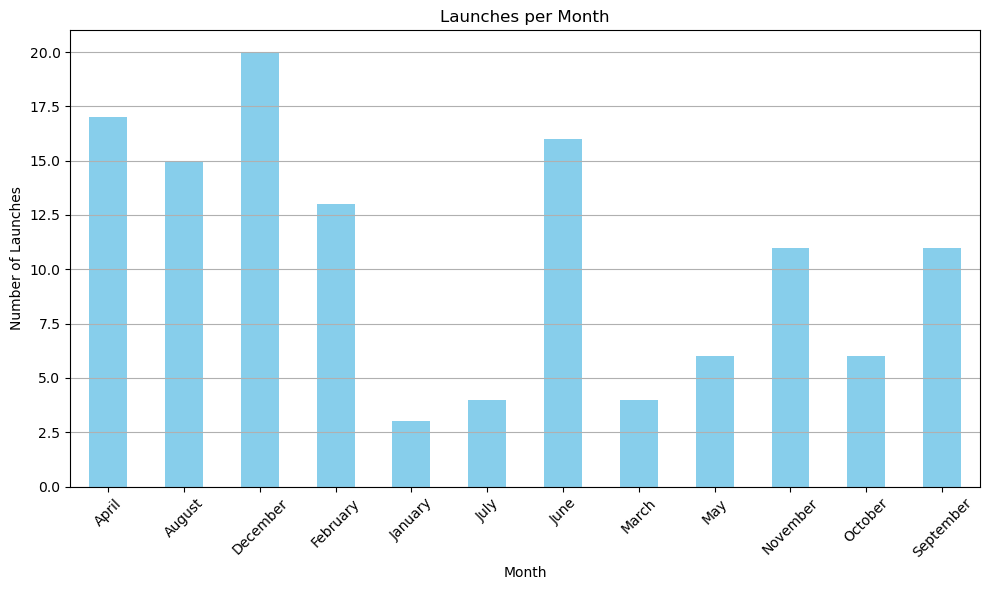

The most popular month for launches is December, with 20 launches.
The least popular month for launches is January, with 3 launches.


In [58]:
# Plot the distribution of launches across different months
plt.figure(figsize=(10, 6))
launches_per_month.plot(kind='bar', color='skyblue')
plt.title('Launches per Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Identify the most popular and least popular months for launches
most_popular_month = launches_per_month.idxmax()
least_popular_month = launches_per_month.idxmin()
print(f"The most popular month for launches is {most_popular_month}, with {launches_per_month.max()} launches.")
print(f"The least popular month for launches is {least_popular_month}, with {launches_per_month.min()} launches.")

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

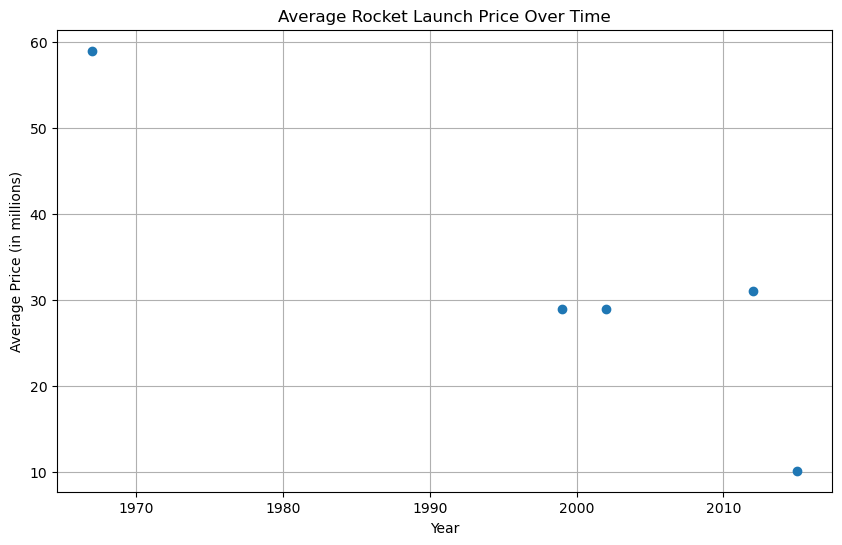

In [59]:
# Group by 'Year' and calculate the average price for each year
average_price_per_year = df_data.groupby('Year')['Price'].mean().reset_index()

# Plot the average price over time
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year['Year'], average_price_per_year['Price'], marker='o')
plt.title('Average Rocket Launch Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (in millions)')
plt.grid(True)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

C:\Users\Admin\AppData\Local\Temp\ipykernel_1404\2174899395.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



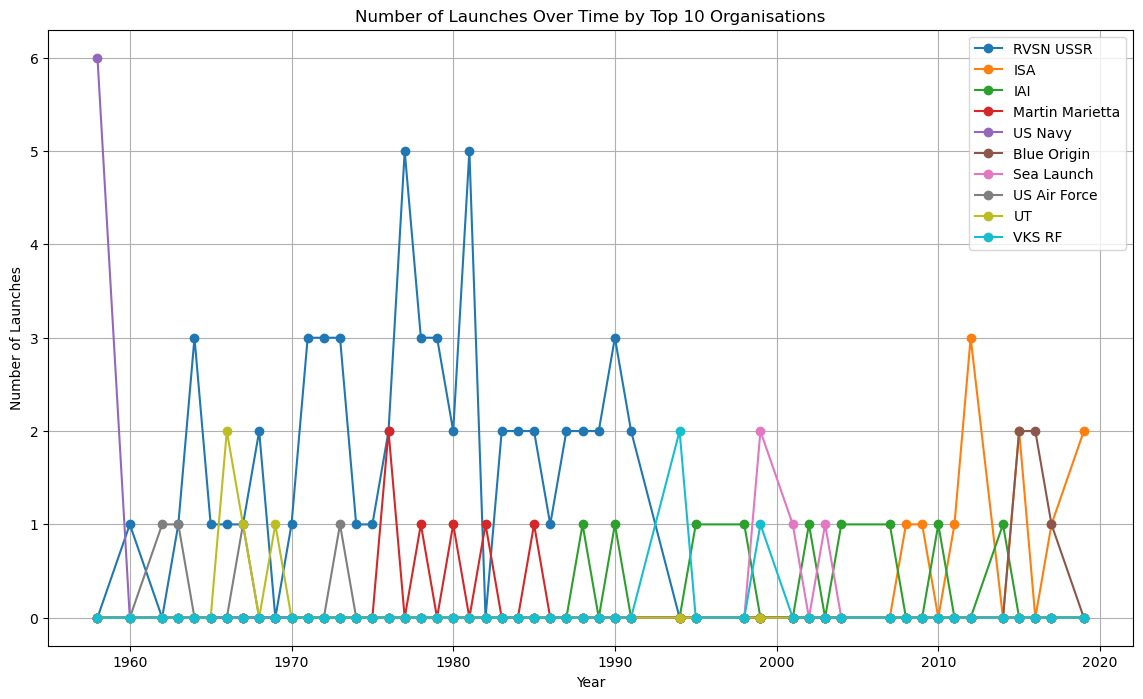

In [60]:
# Determine the top 10 organizations by total number of launches
top_10_orgs = df_data['Organisation'].value_counts().head(10).index

# Filter the dataset to include only the top 10 organizations
df_top_10 = df_data[df_data['Organisation'].isin(top_10_orgs)]

# Extract the year from the 'Date' column
df_top_10['Year'] = df_top_10['Date'].dt.year

# Group by 'Year' and 'Organisation' and count the number of launches
launch_counts = df_top_10.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

# Plot the number of launches over time for each organization
plt.figure(figsize=(14, 8))
for org in top_10_orgs:
    plt.plot(launch_counts.index, launch_counts[org], marker='o', label=org)

plt.title('Number of Launches Over Time by Top 10 Organisations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend()
plt.grid(True)
plt.show()


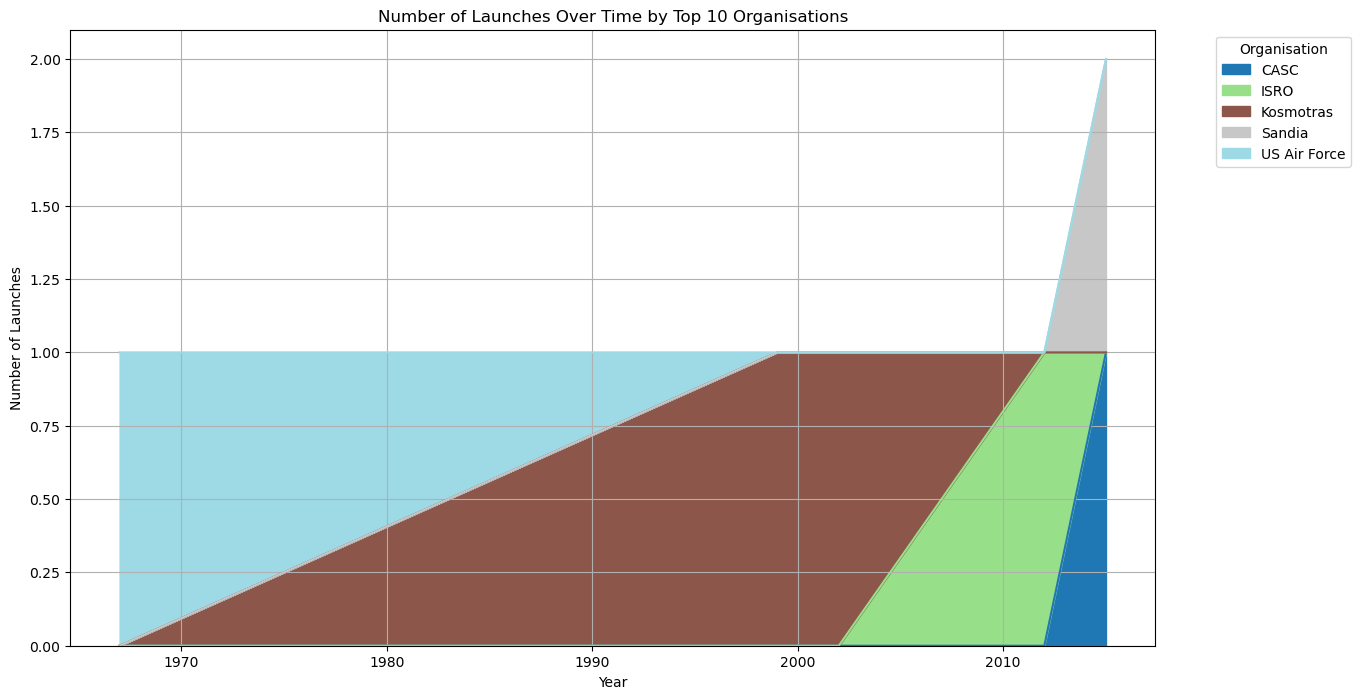

In [34]:
# Ensure necessary columns are present and correct
df_top_10 = df_data[df_data['Organisation'].isin(top_10_orgs)]

# Extract the year from the 'Date' column
df_top_10['Year'] = df_top_10['Date'].dt.year

# Group by 'Year' and 'Organisation' and count the number of launches
launch_counts = df_top_10.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

# Plot the stacked area chart
launch_counts.plot(kind='area', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('Number of Launches Over Time by Top 10 Organisations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


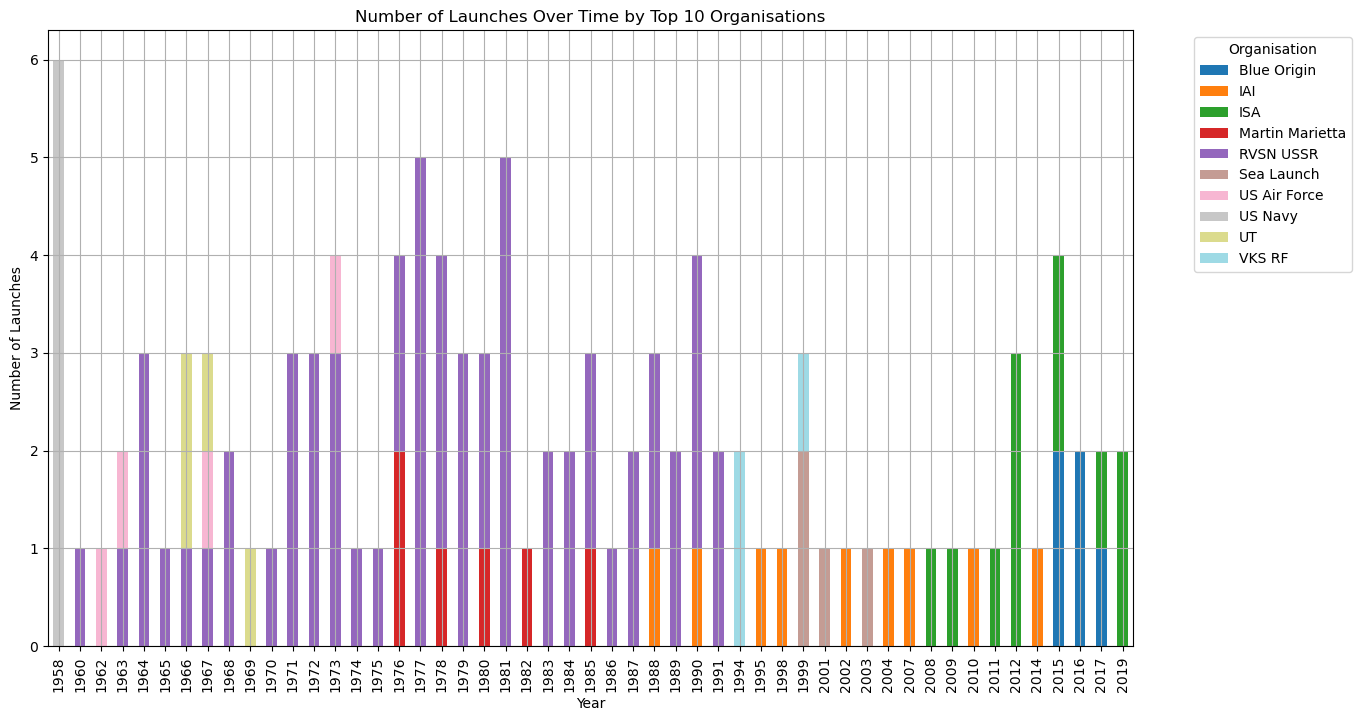

In [61]:
# Plot the stacked bar chart
launch_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('Number of Launches Over Time by Top 10 Organisations')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [65]:
df_data.Country.unique()

array(['Iran', 'USA', 'Pacific Missile Range Facility', 'China', 'Israel',
       'India', 'Brazil', 'Pacific Ocean', 'Kazakhstan', 'Russia',
       'Japan', 'Australia'], dtype=object)

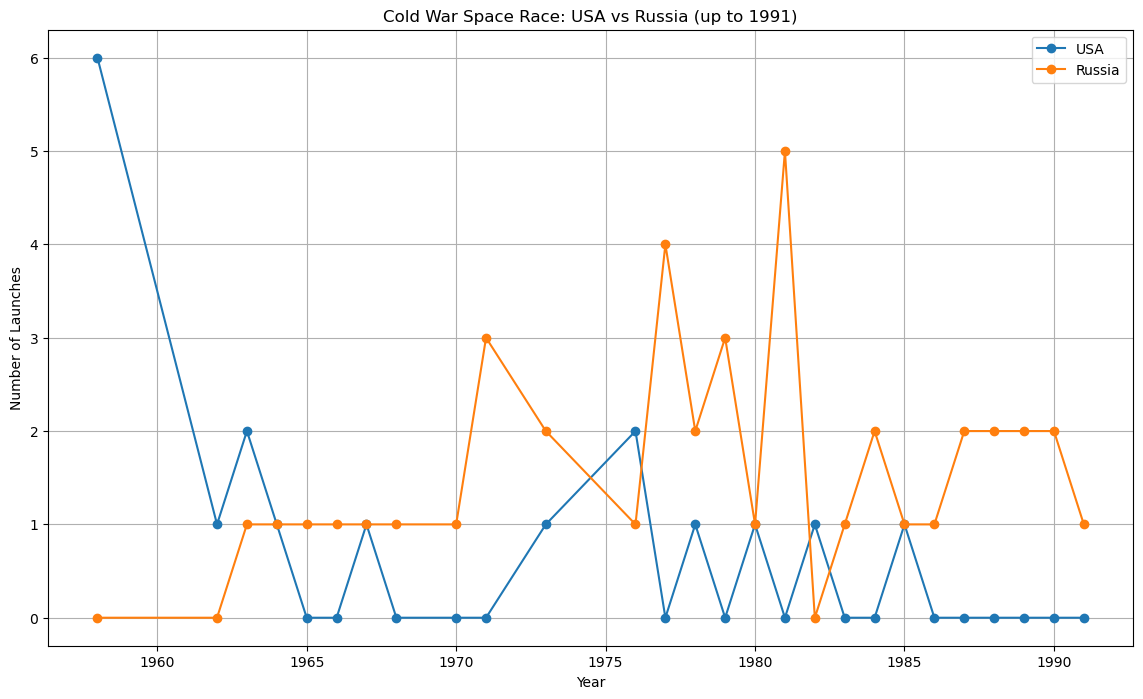

In [67]:
# Filter the dataset to include only launches from USA and USSR up until 1991
cold_war_data = df_data[(df_data['Country'].isin(['USA', 'Russia'])) & (df_data['Year'] <= 1991)]

# Group by 'Year' and 'Country' and count the number of launches
cold_war_launch_counts = cold_war_data.groupby(['Year', 'Country']).size().unstack(fill_value=0)

# Plot the number of launches per year for USA and USSR
plt.figure(figsize=(14, 8))
plt.plot(cold_war_launch_counts.index, cold_war_launch_counts['USA'], marker='o', label='USA')
plt.plot(cold_war_launch_counts.index, cold_war_launch_counts['Russia'], marker='o', label='Russia')

plt.title('Cold War Space Race: USA vs Russia (up to 1991)')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend()
plt.grid(True)
plt.show()


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [69]:
# Define the countries that were part of the USSR
ussr_countries = ['Russia', 'Kazakhstan', 'Ukraine', 'Belarus', 'Uzbekistan', 'Turkmenistan', 
                  'Azerbaijan', 'Armenia', 'Georgia', 'Latvia', 'Lithuania', 'Estonia', 'Moldova', 
                  'Kyrgyzstan', 'Tajikistan']

# Map the countries to 'USSR' or 'USA'
df_data['Superpower'] = df_data['Country'].apply(lambda x: 'USSR' if x in ussr_countries else ('USA' if x == 'USA' else 'Other'))

# Filter the dataset to include only launches from 'USA' and 'USSR' up until 1991
cold_war_data = df_data[(df_data['Superpower'].isin(['USA', 'USSR'])) & (df_data['Year'] <= 1991)]

# Calculate the total number of launches for each superpower
launch_counts = cold_war_data['Superpower'].value_counts().reset_index()
launch_counts.columns = ['Superpower', 'Launches']

# Create the pie chart
fig = px.pie(launch_counts, names='Superpower', values='Launches', 
             title='Total Number of Launches: USA vs USSR (up to 1991)', 
             color_discrete_map={'USA': 'blue', 'USSR': 'red'})

# Show the plot
fig.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1404\2674829476.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

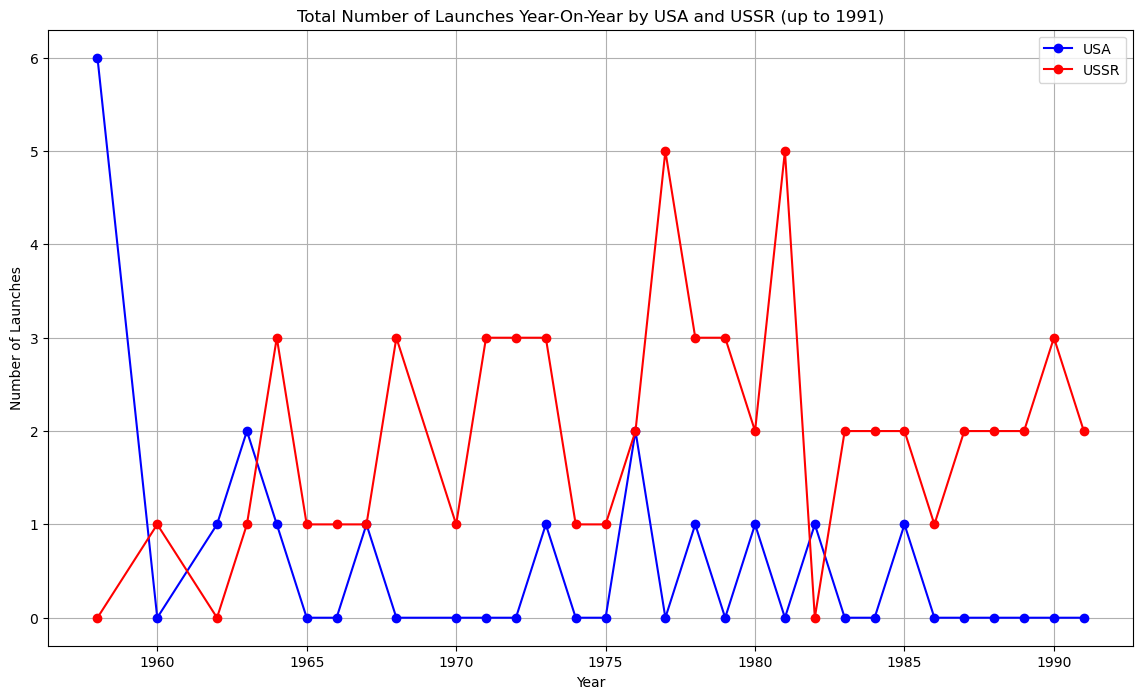

In [70]:
# Filter the dataset to include only launches from 'USA' and 'USSR' up until 1991
cold_war_data = df_data[(df_data['Superpower'].isin(['USA', 'USSR'])) & (df_data['Year'] <= 1991)]

# Group by 'Year' and 'Superpower' and count the number of launches
launch_counts_by_year = cold_war_data.groupby(['Year', 'Superpower']).size().unstack(fill_value=0)

# Plot the results using a line chart
plt.figure(figsize=(14, 8))
plt.plot(launch_counts_by_year.index, launch_counts_by_year['USA'], marker='o', label='USA', color='blue')
plt.plot(launch_counts_by_year.index, launch_counts_by_year['USSR'], marker='o', label='USSR', color='red')

plt.title('Total Number of Launches Year-On-Year by USA and USSR (up to 1991)')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend()
plt.grid(True)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

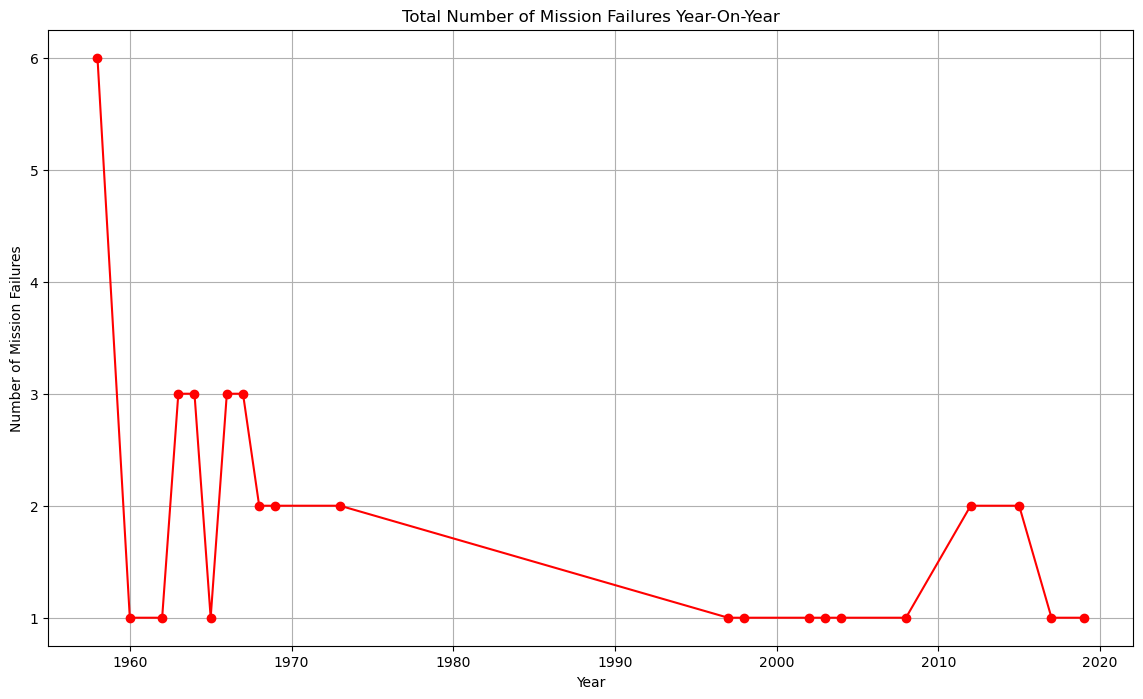

In [71]:
# Filter the dataset to include only mission failures
failures_data = df_data[df_data['Mission_Status'] == 'Failure']

# Group by 'Year' and count the number of failures
failures_by_year = failures_data.groupby('Year').size().reset_index(name='Failures')

# Plot the results using a line chart
plt.figure(figsize=(14, 8))
plt.plot(failures_by_year['Year'], failures_by_year['Failures'], marker='o', color='red')

plt.title('Total Number of Mission Failures Year-On-Year')
plt.xlabel('Year')
plt.ylabel('Number of Mission Failures')
plt.grid(True)
plt.show()


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

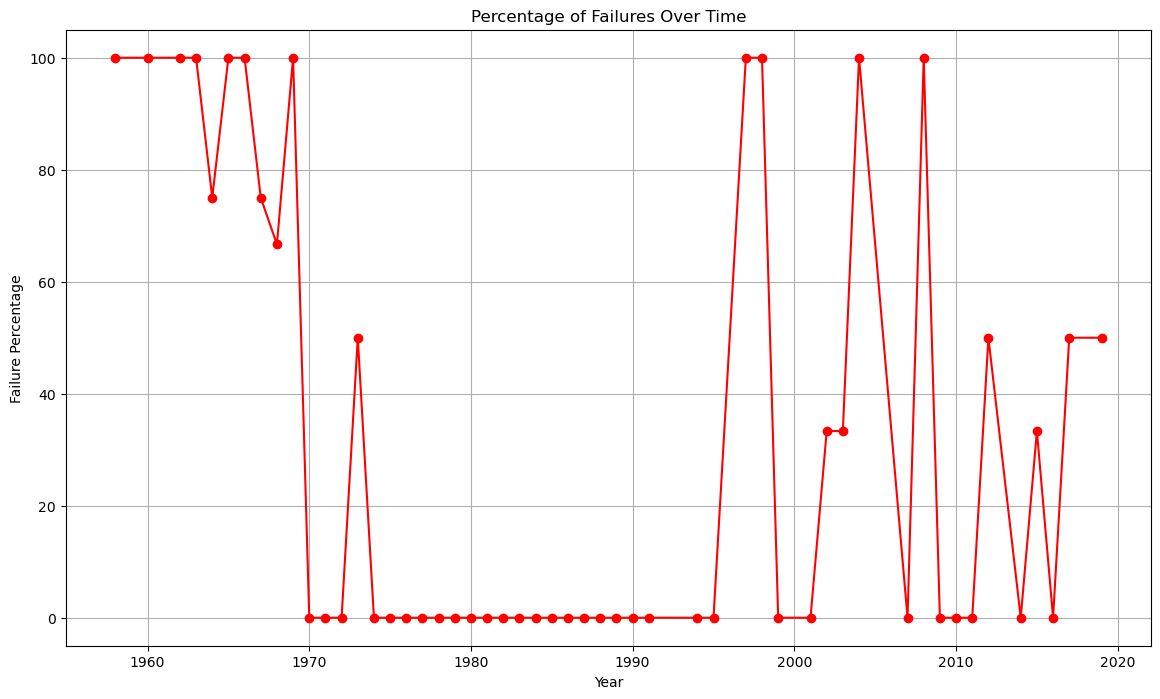

In [72]:
# Group by 'Year' and count the total number of launches and failures
launches_by_year = df_data.groupby('Year').size().reset_index(name='Total Launches')
failures_by_year = failures_data.groupby('Year').size().reset_index(name='Failures')

# Merge the two dataframes on 'Year'
failures_percentage = pd.merge(launches_by_year, failures_by_year, on='Year', how='left')

# Fill missing values with 0 (years with no failures)
failures_percentage['Failures'].fillna(0, inplace=True)

# Calculate the percentage of failures for each year
failures_percentage['Failure Percentage'] = (failures_percentage['Failures'] / failures_percentage['Total Launches']) * 100

# Plot the results using a line chart
plt.figure(figsize=(14, 8))
plt.plot(failures_percentage['Year'], failures_percentage['Failure Percentage'], marker='o', color='red')

plt.title('Percentage of Failures Over Time')
plt.xlabel('Year')
plt.ylabel('Failure Percentage')
plt.grid(True)
plt.show()


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [73]:
# Filter the dataset to include only launches up to and including 2020
data_up_to_2020 = df_data[df_data['Year'] <= 2020]

# Group by 'Year' and 'Country' and count the number of launches
total_launches_by_year = data_up_to_2020.groupby(['Year', 'Country']).size().unstack(fill_value=0)

# Determine the country with the highest number of launches each year
country_lead_total_launches = total_launches_by_year.idxmax(axis=1)

# Print the results for total launches
print("Country in the lead in terms of total launches each year:")
print(country_lead_total_launches)

# Filter the dataset to include only successful launches
successful_launches = data_up_to_2020[data_up_to_2020['Mission_Status'] == 'Success']

# Group by 'Year' and 'Country' and count the number of successful launches
successful_launches_by_year = successful_launches.groupby(['Year', 'Country']).size().unstack(fill_value=0)

# Determine the country with the highest number of successful launches each year
country_lead_successful_launches = successful_launches_by_year.idxmax(axis=1)

# Print the results for successful launches
print("\nCountry in the lead in terms of successful launches each year:")
print(country_lead_successful_launches)


Country in the lead in terms of total launches each year:
Year
1958              USA
1960       Kazakhstan
1962              USA
1963              USA
1964       Kazakhstan
1965           Russia
1966            Japan
1967        Australia
1968       Kazakhstan
1969            China
1970           Russia
1971           Russia
1972       Kazakhstan
1973           Russia
1974       Kazakhstan
1975       Kazakhstan
1976              USA
1977           Russia
1978           Russia
1979           Russia
1980       Kazakhstan
1981           Russia
1982              USA
1983       Kazakhstan
1984           Russia
1985       Kazakhstan
1986           Russia
1987           Russia
1988           Russia
1989           Russia
1990           Russia
1991       Kazakhstan
1994       Kazakhstan
1995           Israel
1997           Brazil
1998           Israel
1999    Pacific Ocean
2001    Pacific Ocean
2002            China
2003           Brazil
2004           Israel
2007           Israel
2008         

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

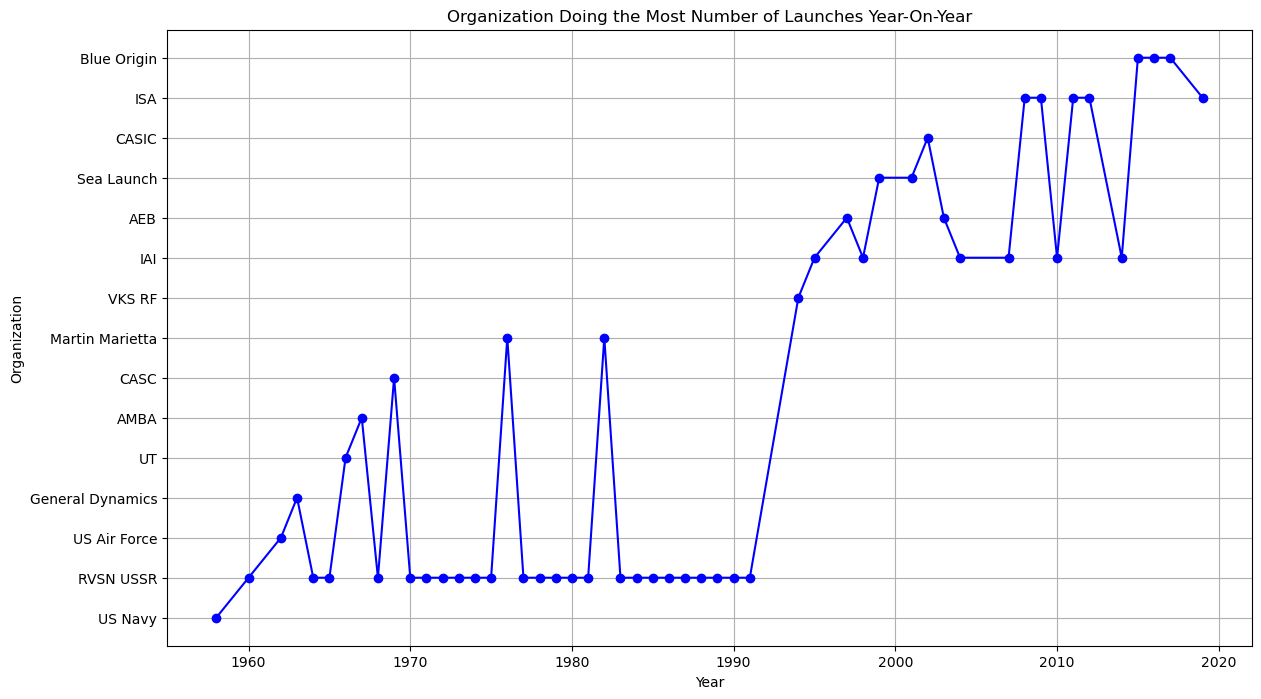

In [74]:
# Group by 'Year' and 'Organisation' and count the number of launches
launches_by_year_org = data_up_to_2020.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

# Determine the organization with the highest number of launches each year
org_lead_by_year = launches_by_year_org.idxmax(axis=1)

# Plot the results using a line chart
plt.figure(figsize=(14, 8))
plt.plot(org_lead_by_year.index, org_lead_by_year.values, marker='o', color='blue')

plt.title('Organization Doing the Most Number of Launches Year-On-Year')
plt.xlabel('Year')
plt.ylabel('Organization')
plt.grid(True)
plt.show()

In [76]:
# Filter the dataset to include only launches in 2018, 2019, and 2020
data_2018_to_2020 = df_data[df_data['Year'].isin([2018, 2019, 2020])]

# Group by 'Year' and 'Organisation' and count the number of launches
launches_by_year_org = data_2018_to_2020.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

# Determine the organization with the highest number of launches in each year
org_lead_2018 = launches_by_year_org.loc[2018].idxmax() if 2018 in launches_by_year_org.index else "No data"
org_lead_2019 = launches_by_year_org.loc[2019].idxmax() if 2019 in launches_by_year_org.index else "No data"
org_lead_2020 = launches_by_year_org.loc[2020].idxmax() if 2020 in launches_by_year_org.index else "No data"

print("Dominant organization in 2018:", org_lead_2018)
print("Dominant organization in 2019:", org_lead_2019)
print("Dominant organization in 2020:", org_lead_2020)


Dominant organization in 2018: No data
Dominant organization in 2019: ISA
Dominant organization in 2020: No data
